### Assignment

1. Load the titanic dataset from seaborn library
2. Group the ages and create age bins and labels
3. How many people based on age categories:
    - survived?
    - did not survive?
4. Create appropriate plot to explain

In [1]:
import seaborn as sns, numpy as np, statistics as stats
import matplotlib.pyplot as plt
import scipy as sp, pandas as pd

print('Done')

Done


# 1. Loading dataset from seaborn...

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 2a. Determining whether to remove or replace null values in the age column

In [3]:
# Calling for columns
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
# Checking for the amount of the values in the age column

titanic.age.value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

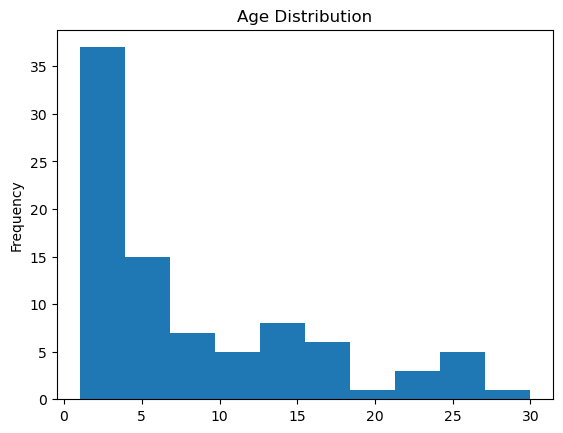

In [5]:
# Checking distribution as histogram chart

titanic.age.value_counts().plot(kind='hist', title = "Age Distribution")

In [6]:
# Checking for minimum and max value

print('Maximum Age: ', titanic.age.max())
print('Minimum Age: ', titanic.age.min())

Maximum Age:  80.0
Minimum Age:  0.42


In [7]:
titanic.age.dtypes

dtype('float64')

In [8]:
# To round the figures to a whole number.

titanic.age.round()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [9]:
# Checking the amount of null values
titanic.age.isna().sum()

177

In [10]:
# Checking the amount of rows
titanic.age.shape

(891,)

In [11]:
# Now we see that ~20% of age column is blank.

In [12]:
# Looking for further ways to minimize the null values, we shall check for relationship between the age and other columns.
# This is to help us develop a predictive model we can use to fill our age['missing values'].

In [13]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [14]:
# Checking the null values in the dataframe.
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

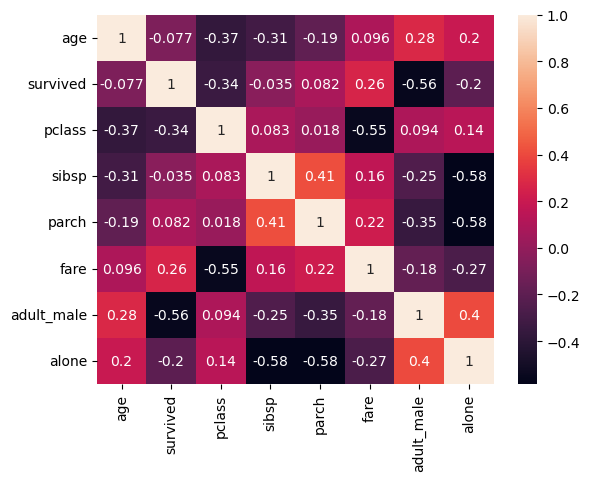

In [16]:
# We will correlate the age columns with other columns to check for any possible relationship.
sns.heatmap(titanic[['age', 'survived', 'pclass', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']].corr(), annot = True)
plt.show()

In [17]:
# We can notice the rvalue from the heatmap on the 'age' axis. There is no figure close to either '1' or '-1'.
# Therefore we cannot create a linear regression model based on this result the heat map has revealed.

In [18]:
# What if we fill null values with the average of age?

# Creatig a variable to hold this test.
av_age = titanic['age'].fillna(titanic['age'].mean())

av_age.isnull().sum()

0

In [19]:
# Copying titanic into a variable as Pandas DataFrame.

titan = pd.DataFrame(titanic)
titan.loc[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [20]:
titan['new_age']=av_age

titan.infer_objects()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000


In [21]:
titan['new_age'].dtype

dtype('float64')

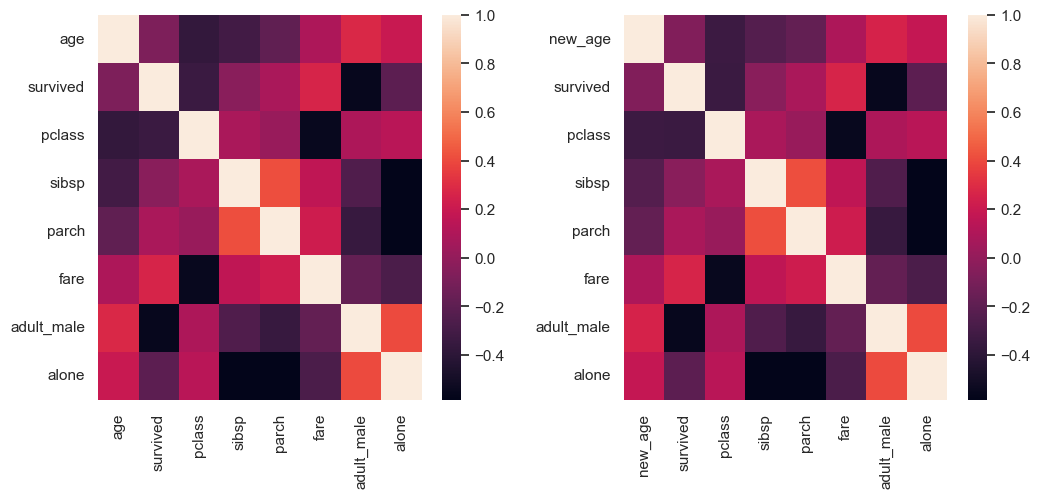

In [22]:
# Checking to see if 'new_age' correlates with other columns via seaborn heatmap...

sns.set(palette= "Set1")
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.subplots_adjust(wspace = 0.3)
sns.heatmap((titanic[['age', 'survived', 'pclass', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']].corr()), ax = ax[0])
sns.heatmap((titan[['new_age', 'survived', 'pclass', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']].corr()), ax = ax[1])
plt.show()

In [23]:
# We see the color gradient being the same, meaning the susbstituion of null values with age.mean() does not have effect on correlation.

In [24]:
# Now we are justified to remove null values from age column and the entire dataset.
# Removing the 'new_age' column to improve performance

del titan['new_age']
print("Deleted new_age column from titan")

Deleted new_age column from titan


In [25]:
# Checking the null values in the dataset

titan.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [26]:
# Removing titan['deck'] as the column is not useful and its null rows in this column are ~77% of the rows in the Dataset.

del titan['deck']
titan.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [27]:
titan.dropna(inplace = True)
print('Done')

Done


In [28]:
titan.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [29]:
titan.shape

(712, 14)

In [30]:
# We still have ~80 percent of the original dataset.

# 2b. Grouping the ages, creating age bins and labels

In [31]:
# Checking for minimum and max value

print('Maximum Age: ', titan.age.max())
print('Minimum Age: ', titan.age.min())

Maximum Age:  80.0
Minimum Age:  0.42


In [32]:
# We need our age in whole numbers, not decimal units.

titan['age']=titan['age'].round()

In [33]:
# Checking for minimum and max value

print('Maximum Age: ', titan.age.max())
print('Minimum Age: ', titan.age.min())

Maximum Age:  80.0
Minimum Age:  0.0


In [34]:
# Age range is from 0 - 80.

C:\Users\Kola\AppData\Local\Temp\ipykernel_216\2033072538.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((titan['age']), ax = ax[1])


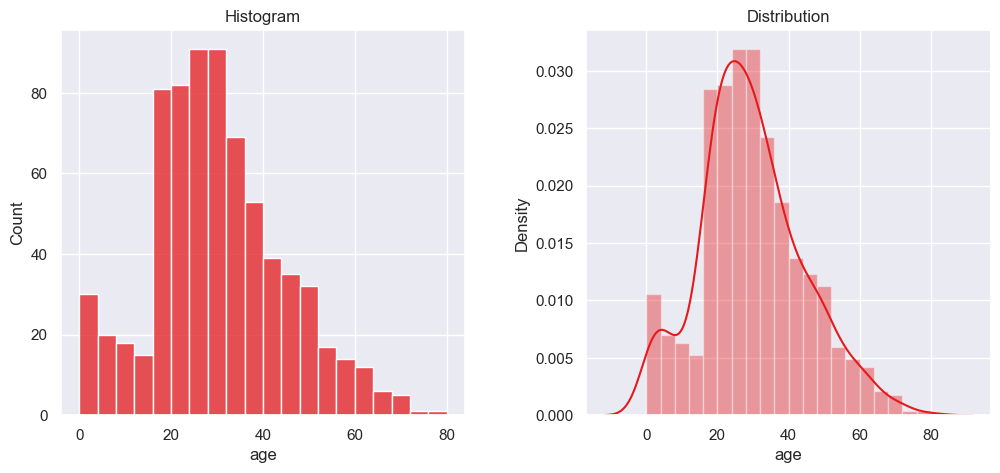

In [35]:
# Checking age distribution on the dist chart and the histogram chart.

sns.set(palette= "Set1")
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.subplots_adjust(wspace = 0.3)
sns.histplot((titan['age']), ax = ax[0])
ax[0].set_title('Histogram')
sns.distplot((titan['age']), ax = ax[1])
ax[1].set_title('Distribution')
plt.show()

In [36]:
# Creating bins and labels for age group.
# [0 - 2] = Baby
# [3 - 5] = Little Child
# [6 - 12] = Child
# [13 - 19] = Teen
# [20 - 39] = Young Adult
# [40 - 59] = Adult
# [60 - 79] = Old
# [80 - 100] = Aged

In [37]:
age_intervals  = [0, 2, 5, 12, 19, 39, 59, 79, 100]
age_labels = ['Baby', 'Little Child', 'Child', 'Teen', 'Young Adult', 'Adult', 'Old', 'Aged']

A = pd.cut(titan['age'], age_intervals)
for i in A.unique():
    print(i)

(19.0, 39.0]
(39.0, 59.0]
(0.0, 2.0]
(12.0, 19.0]
(2.0, 5.0]
(5.0, 12.0]
(59.0, 79.0]
(79.0, 100.0]
nan


In [38]:
titan['age_group']=pd.cut(titan['age'], bins = age_intervals)
titan.loc[:10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,"(19, 39]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,"(19, 39]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,"(19, 39]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,"(19, 39]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,"(19, 39]"
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,"(39, 59]"
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False,"(0, 2]"
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,"(19, 39]"
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,"(12, 19]"
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False,"(2, 5]"


In [39]:
titan['age_group'] = pd.cut(titan['age'], bins = age_intervals, labels = age_labels)
titan.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Young Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Young Adult
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,Adult
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False,Baby
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,Young Adult
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,Teen
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False,Little Child


In [40]:
titan.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
age_group      1
dtype: int64

In [41]:
titan[titan.isna().any(axis = 1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
803,1,3,male,0.0,0,1,8.5167,C,Third,child,False,Cherbourg,yes,False,NaN


In [42]:
titan.dropna(inplace = True)
titan.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
age_group      0
dtype: int64

In [43]:
titan.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
age_group      category
dtype: object

# 3. How many people based on age categories survived and did not survive

In [44]:
# Checking to see the values of the 'survived' column
titan.survived.unique()

array([0, 1], dtype=int64)

In [45]:
# Getting total passengers based on age group...

titan_age_group = titan.groupby('age_group')
titan_age_group.size()

age_group
Baby             23
Little Child     20
Child            25
Teen             95
Young Adult     386
Adult           137
Old              24
Aged              1
dtype: int64

In [46]:
# Getting total survivors...
survivor = titan.groupby('survived').get_group(1)
survivor.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Young Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young Adult


In [47]:
# Getting total victims...
victim = titan.groupby('survived').get_group(0)
victim.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,Southampton,no,False,Young Adult
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,Southampton,no,True,Young Adult


In [48]:
# Showing total victims across age-groups with simple value_counts()

victim['age_group'].value_counts()

age_group
Young Adult     237
Adult            83
Teen             56
Old              19
Child            16
Baby              9
Little Child      4
Aged              0
Name: count, dtype: int64

In [49]:
# Showing total survivors across age-groups with simple value_counts()

survivor['age_group'].value_counts()

age_group
Young Adult     149
Adult            54
Teen             39
Little Child     16
Baby             14
Child             9
Old               5
Aged              1
Name: count, dtype: int64

# 4. Representing findings as a visual...

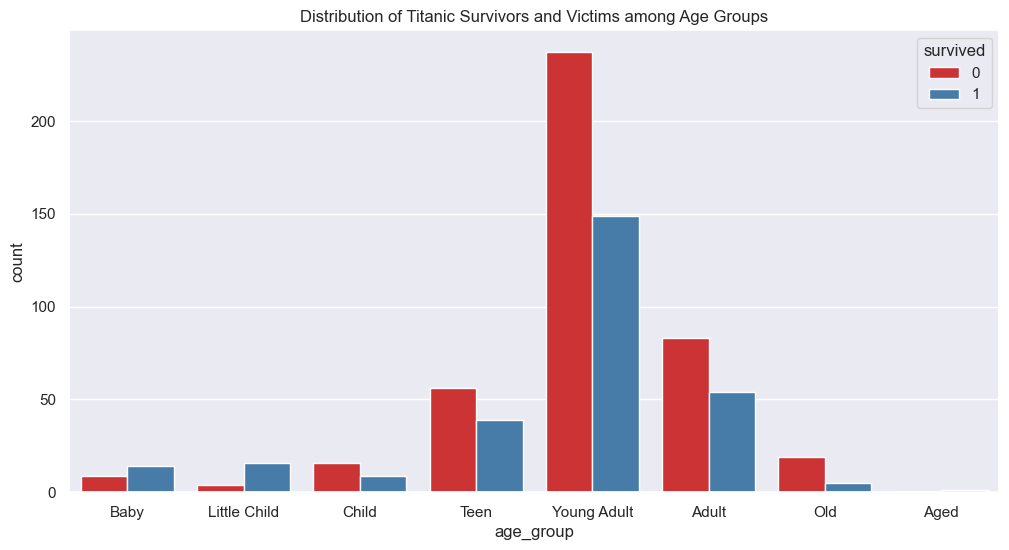

In [50]:
plt.figure(figsize = (12,6))
sns.set(palette = 'Set1')
sns.countplot(data = titan, x= 'age_group', hue = 'survived')
plt.title('Distribution of Titanic Survivors and Victims among Age Groups')
plt.show()

In [51]:
print('Assignment completed.')

Assignment completed.
